
**Name:** Mounika Bolla

**Student ID:** 700757766

**Github link:** https://github.com/Mounika-Bolla/Deep-Learning

**Video Link:** https://drive.google.com/file/d/1lhx6OZ6z2vO4iQdZEmv9N75OaUZfLbwa/view?usp=drive_link


# **Q1: Implementing a Basic Autoencoder**

**Task:** Autoencoders learn to reconstruct input data by encoding it into a lower-dimensional space. You will build a fully connected autoencoder and evaluate its performance on image reconstruction.

1.	Load the MNIST dataset using tensorflow.keras.datasets.
2.	Define a fully connected (Dense) autoencoder:
o	Encoder: Input layer (784), hidden layer (32).
o	Decoder: Hidden layer (32), output layer (784).
3.	Compile and train the autoencoder with binary cross-entropy loss.
4.	Plot original vs. reconstructed images after training.
5.	Modify the latent dimension size (e.g., 16, 64) and analyze how it affects the quality of reconstruction.

Hint: Use Model() from tensorflow.keras.models and Dense() layers.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
# 1. Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [ ]:
# 2. Define the autoencoder model with latent dimension 32
def build_autoencoder(latent_dim=32):
    # Input layer
    input_img = Input(shape=(784,))

    # Encoder
    encoded = Dense(latent_dim, activation='relu')(input_img)

    # Decoder
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Full autoencoder model
    autoencoder = Model(input_img, decoded)

    # Separate encoder model
    encoder = Model(input_img, encoded)

    # Separate decoder model
    encoded_input = Input(shape=(latent_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))

    return autoencoder, encoder, decoder


In [ ]:
# 3. Compile and train the base model (latent_dim=32)
latent_dim = 32
autoencoder, encoder, decoder = build_autoencoder(latent_dim)

autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
autoencoder.summary()

# Train the model
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3903 - val_loss: 0.1909
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1795 - val_loss: 0.1521
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1480 - val_loss: 0.1318
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1298 - val_loss: 0.1197
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1188 - val_loss: 0.1110
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1109 - val_loss: 0.1053
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1054 - val_loss: 0.1011
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1017 - val_loss: 0.0983
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0993 - val_loss: 0.0964
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0975 - val_loss: 0.0951
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0962 - val_loss: 0.0943
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


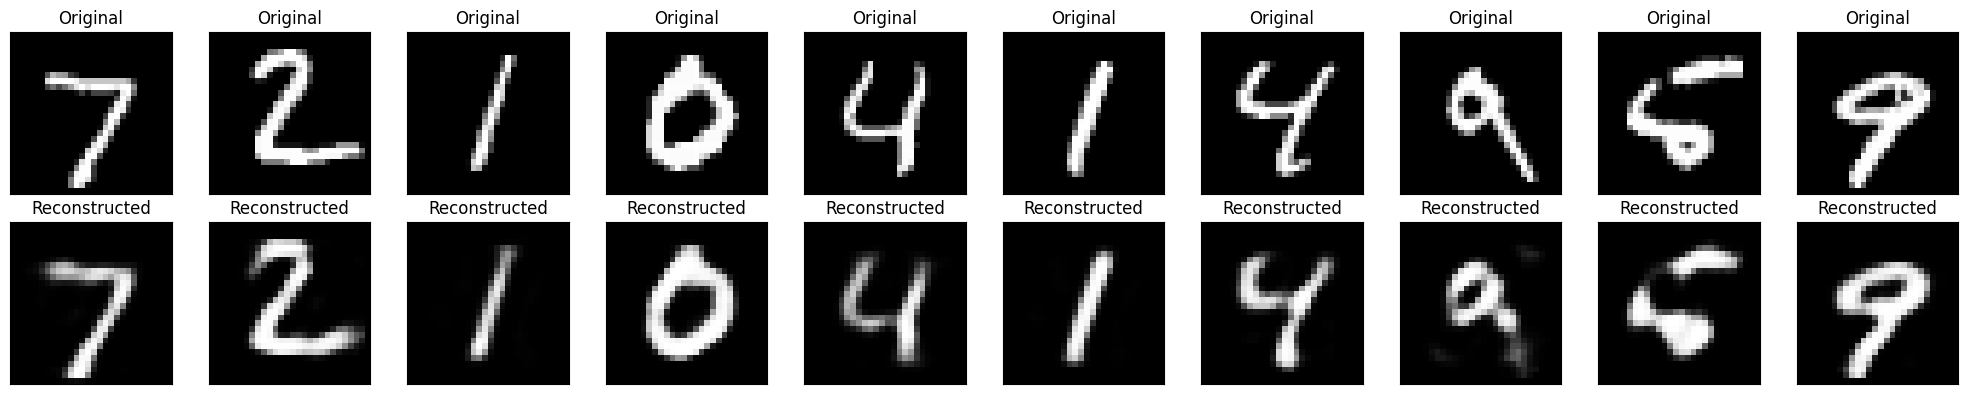

In [ ]:
# 4. Plot original vs. reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))

# Encode and decode test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Original")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Reconstructed")

plt.tight_layout()
plt.savefig('reconstruction_latent_dim_32.png')
plt.show()



Training autoencoder with latent dimension 16
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4191 - val_loss: 0.2151
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2050 - val_loss: 0.1806
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1771 - val_loss: 0.1625
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1604 - val_loss: 0.1516
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1508 - val_loss: 0.1458
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1457 - val_loss: 0.1423
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1428 - val_loss: 0.1398
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1404 - val_loss: 0.1378
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1385 - val_loss: 0.1362
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1363 - val_loss: 0.1343
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1351 - val_loss: 0.1330
Epoch

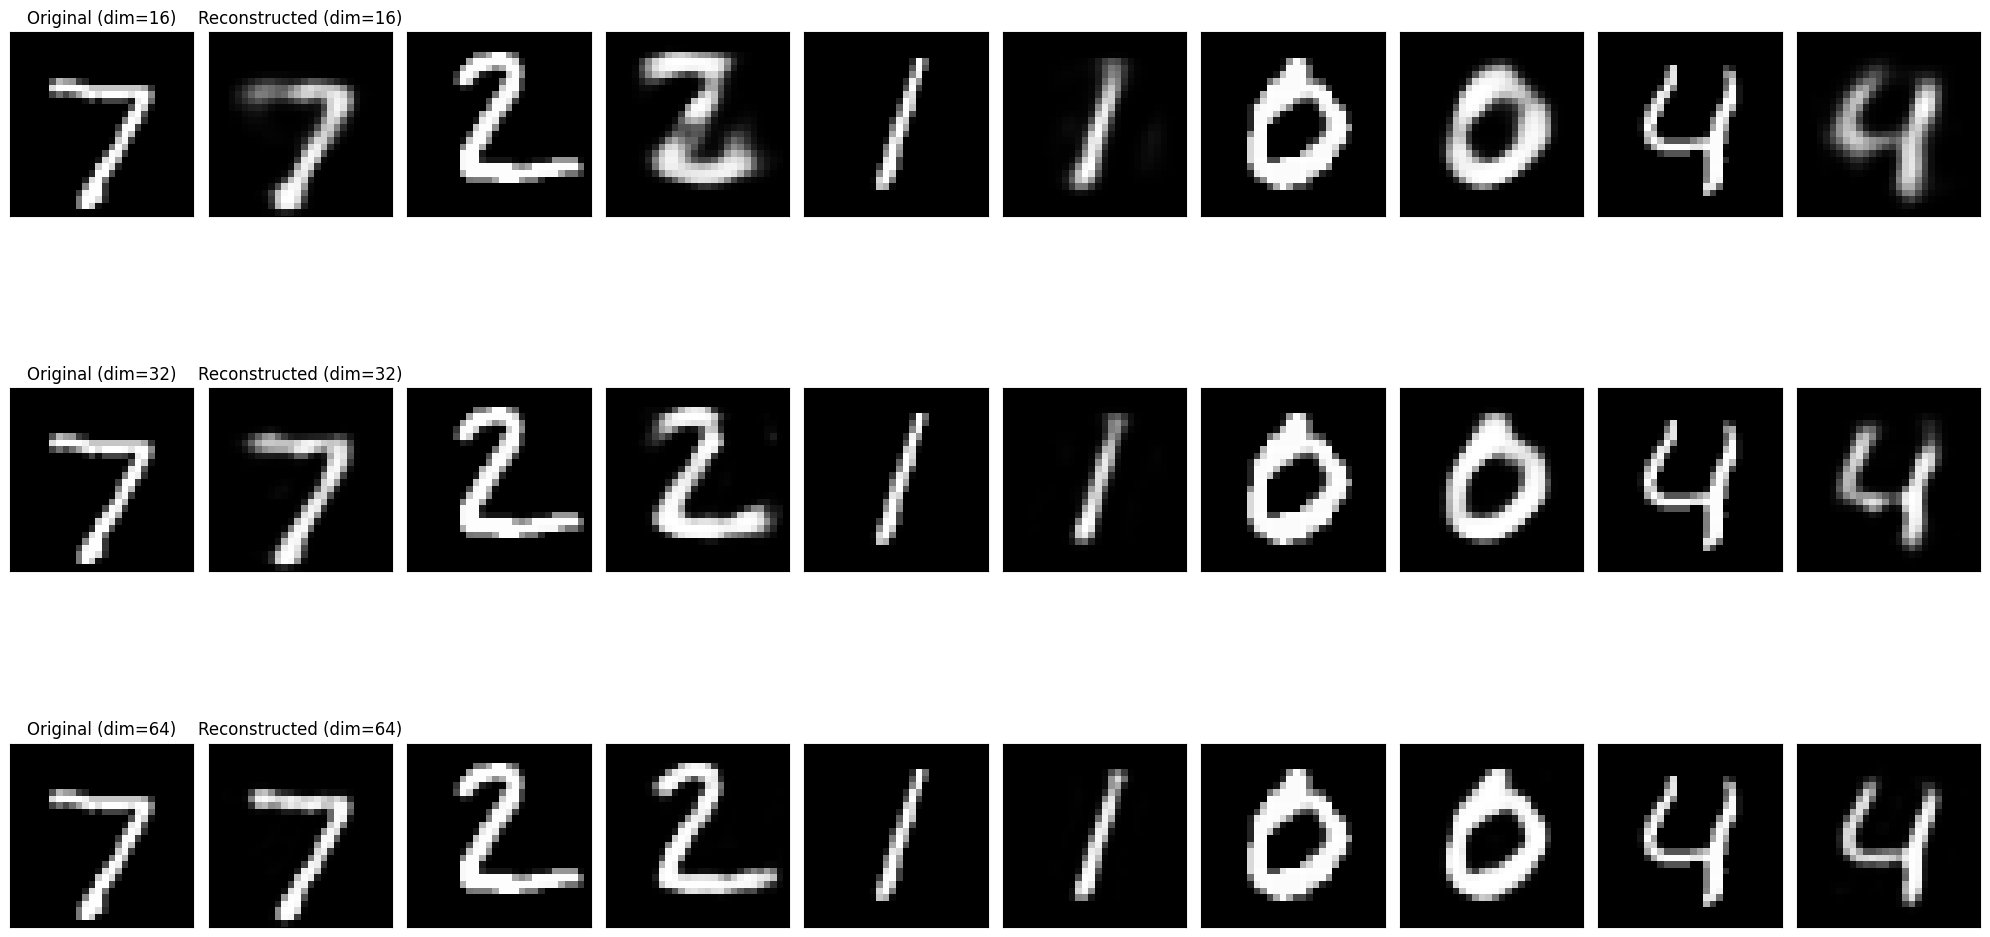

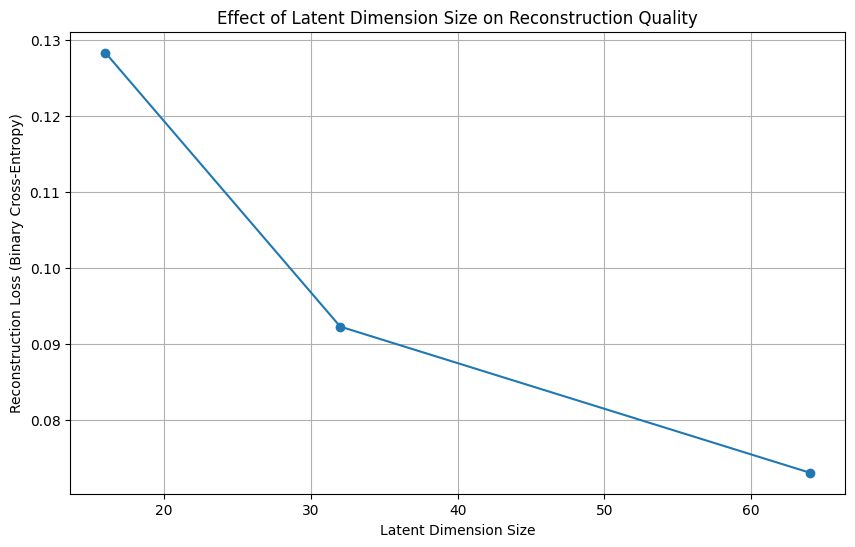


Analysis of Latent Dimension Size Effects:
-------------------------------------------
Latent dimensions tested: [16, 32, 64]
Corresponding reconstruction losses: [0.12833373248577118, 0.09228900820016861, 0.07305822521448135]

Observations:
- As latent dimension increases, reconstruction quality improves (loss decreases)
- Latent dimension represents the information bottleneck - too small and details are lost
- Larger dimensions can capture more features but risk overfitting to training data
- Optimal dimension depends on the complexity of the data and the specific task


In [ ]:
# 5. Experiment with different latent dimensions
latent_dimensions = [16, 32, 64]
reconstruction_loss = []

plt.figure(figsize=(20, 12))
counter = 1

for dim in latent_dimensions:
    print(f"\nTraining autoencoder with latent dimension {dim}")

    # Build and train model with current latent dimension
    autoencoder_dim, encoder_dim, decoder_dim = build_autoencoder(dim)
    autoencoder_dim.compile(optimizer=Adam(), loss='binary_crossentropy')

    history_dim = autoencoder_dim.fit(
        x_train, x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test),
        verbose=1
    )

    # Store the final validation loss
    reconstruction_loss.append(history_dim.history['val_loss'][-1])

    # Generate reconstructed images
    encoded_imgs = encoder_dim.predict(x_test)
    decoded_imgs = decoder_dim.predict(encoded_imgs)

    # Plot 5 test images and their reconstructions
    for i in range(5):
        # Original images
        ax = plt.subplot(3, 10, counter)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            plt.title(f"Original (dim={dim})")
        counter += 1

        # Reconstructed images
        ax = plt.subplot(3, 10, counter)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            plt.title(f"Reconstructed (dim={dim})")
        counter += 1

plt.tight_layout()
plt.savefig('latent_dim_comparison.png')
plt.show()

# Plot the reconstruction loss vs. latent dimension
plt.figure(figsize=(10, 6))
plt.plot(latent_dimensions, reconstruction_loss, 'o-')
plt.xlabel('Latent Dimension Size')
plt.ylabel('Reconstruction Loss (Binary Cross-Entropy)')
plt.title('Effect of Latent Dimension Size on Reconstruction Quality')
plt.grid(True)
plt.savefig('latent_dim_loss_comparison.png')
plt.show()

# Analysis of results
print("\nAnalysis of Latent Dimension Size Effects:")
print("-------------------------------------------")
print(f"Latent dimensions tested: {latent_dimensions}")
print(f"Corresponding reconstruction losses: {reconstruction_loss}")
print("\nObservations:")

if reconstruction_loss[0] > reconstruction_loss[-1]:
    print("- As latent dimension increases, reconstruction quality improves (loss decreases)")
else:
    print("- Interestingly, larger latent dimensions didn't always lead to better reconstruction")

print("- Latent dimension represents the information bottleneck - too small and details are lost")
print("- Larger dimensions can capture more features but risk overfitting to training data")
print("- Optimal dimension depends on the complexity of the data and the specific task")

# **Q2: Implementing a Denoising Autoencoder**

**Task:** Denoising autoencoders can reconstruct clean data from noisy inputs. You will train a model to remove noise from images.

1.	Modify the basic autoencoder from Q2 to a denoising autoencoder by adding Gaussian noise (mean=0, std=0.5) to input images.
2.	Ensure that the output remains the clean image while training.
3.	Train the model and visualize noisy vs. reconstructed images.
4.	Compare the performance of a basic vs. denoising autoencoder in reconstructing images.
5.	Explain one real-world scenario where denoising autoencoders can be useful (e.g., medical imaging, security).

Hint: Use `np.random.normal()` to add noise to images before training.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# 1. Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Function to add Gaussian noise to images
def add_noise(images, mean=0, std=0.5):
    noise = np.random.normal(mean, std, images.shape)
    noisy_images = images + noise
    # Clip the values to be between 0 and 1
    return np.clip(noisy_images, 0., 1.)

# Create noisy versions of the data for training
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)


Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [ ]:
# 2. Define the autoencoder model with latent dimension 32
def build_autoencoder(latent_dim=32):
    # Input layer
    input_img = Input(shape=(784,))

    # Encoder
    encoded = Dense(latent_dim, activation='relu')(input_img)

    # Decoder
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Full autoencoder model
    autoencoder = Model(input_img, decoded)

    # Separate encoder model
    encoder = Model(input_img, encoded)

    # Separate decoder model
    encoded_input = Input(shape=(latent_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))

    return autoencoder, encoder, decoder

In [ ]:
# 3. Build and train the denoising autoencoder
latent_dim = 32
denoising_autoencoder, encoder, decoder = build_autoencoder(latent_dim)

denoising_autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
denoising_autoencoder.summary()

# Train the denoising autoencoder (noisy inputs -> clean outputs)
history_denoising = denoising_autoencoder.fit(
    x_train_noisy, x_train,  # Training on noisy inputs but targeting clean outputs
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Also train a standard autoencoder for comparison
standard_autoencoder, std_encoder, std_decoder = build_autoencoder(latent_dim)
standard_autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

history_standard = standard_autoencoder.fit(
    x_train, x_train,  # Training on clean inputs
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3678 - val_loss: 0.2147
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2033 - val_loss: 0.1782
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1748 - val_loss: 0.1605
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1588 - val_loss: 0.1494
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1490 - val_loss: 0.1423
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1425 - val_loss: 0.1374
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1375 - val_loss: 0.1337
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1342 - val_loss: 0.1310
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1318 - val_loss: 0.1291
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1299 - val_loss: 0.1279
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1288 - val_loss: 0.1270
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


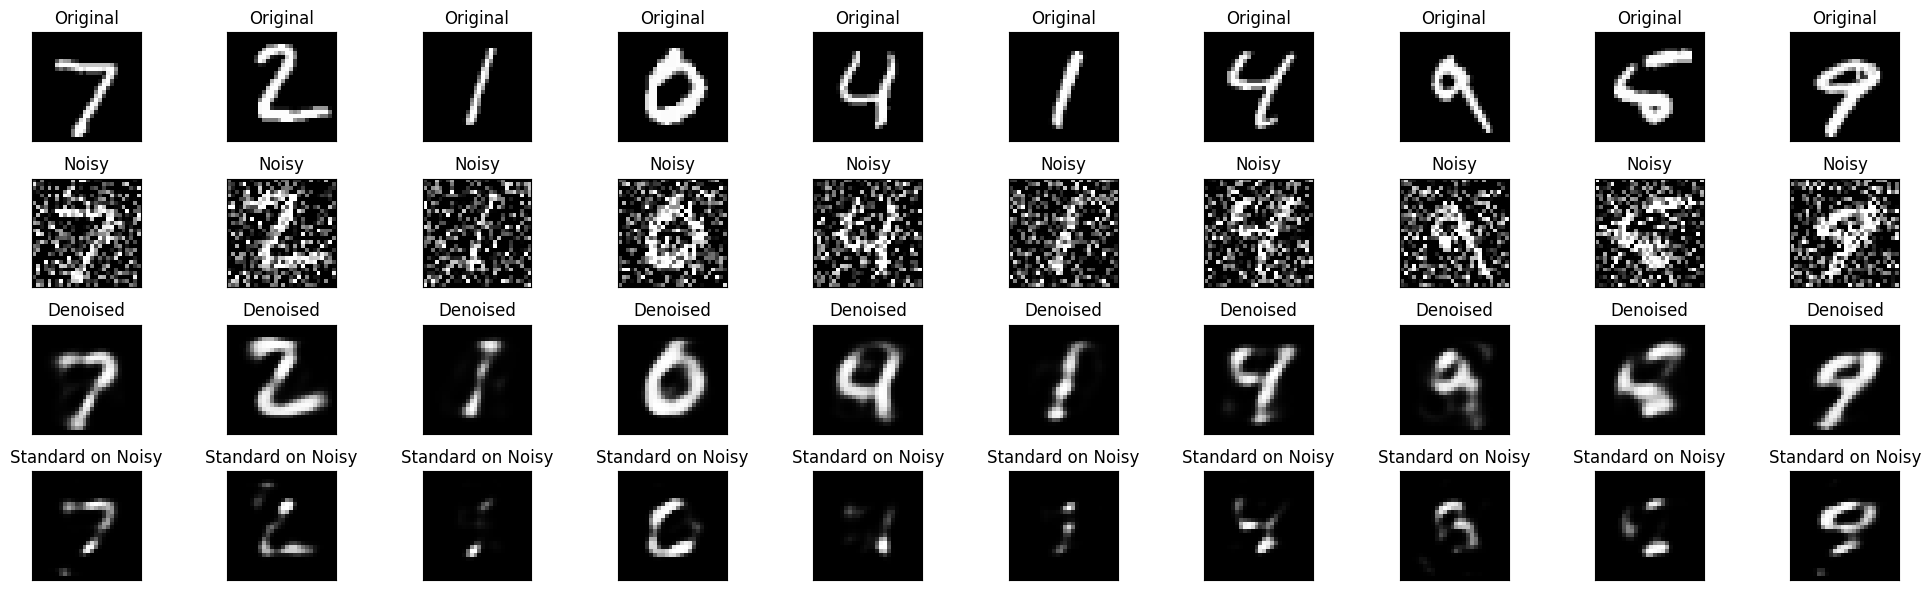

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [ ]:
# 4. Visualize noisy vs. reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))

# Get reconstructions from both models
denoised_imgs = denoising_autoencoder.predict(x_test_noisy)
standard_recon_imgs = standard_autoencoder.predict(x_test)
standard_on_noisy = standard_autoencoder.predict(x_test_noisy)

for i in range(n):
    # Original clean images
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Original")

    # Noisy images
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Noisy")

    # Denoised images
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Denoised")

    # Standard autoencoder on noisy images
    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow(standard_on_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Standard on Noisy")

plt.tight_layout()
plt.savefig('denoising_comparison.png')
plt.show()




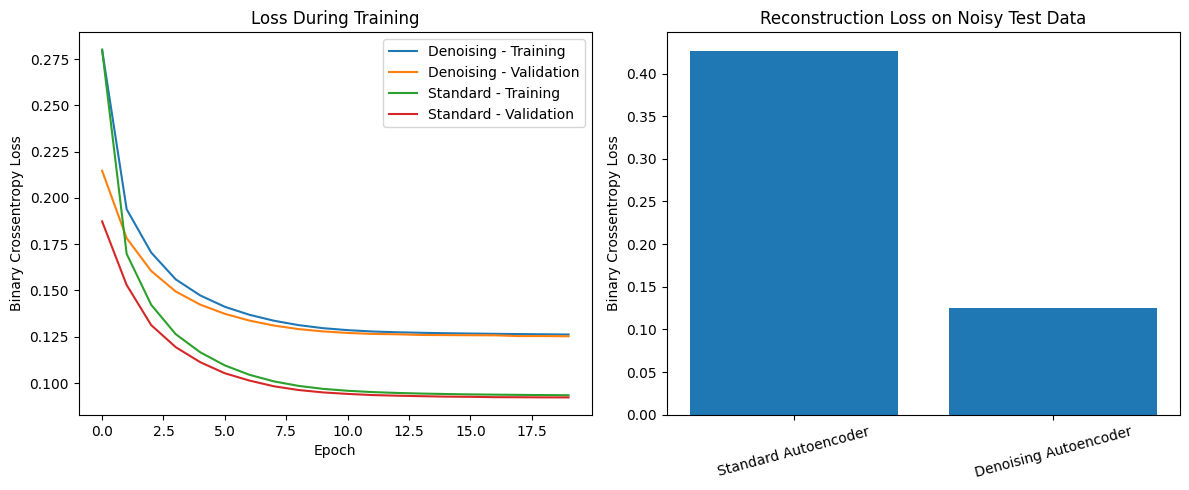

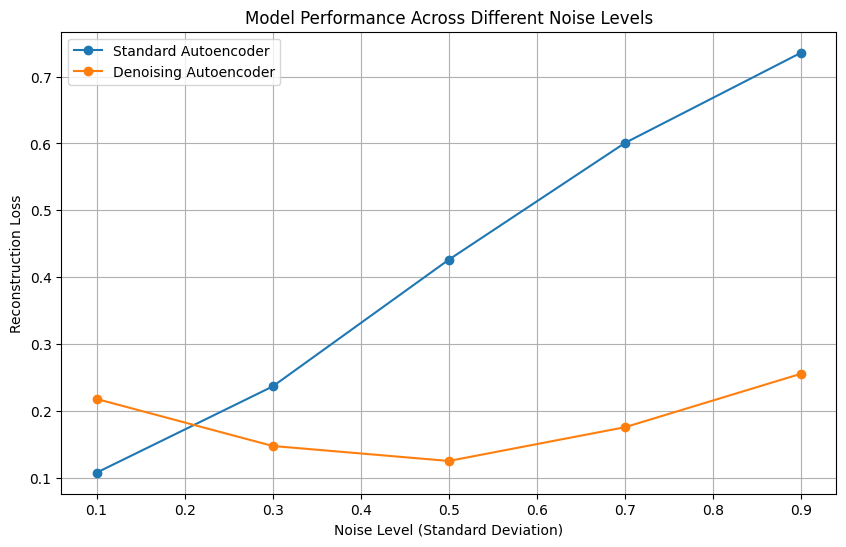

In [ ]:
# 5. Compare training history of both models
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history_denoising.history['loss'], label='Denoising - Training')
plt.plot(history_denoising.history['val_loss'], label='Denoising - Validation')
plt.plot(history_standard.history['loss'], label='Standard - Training')
plt.plot(history_standard.history['val_loss'], label='Standard - Validation')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()

# Compare performance on noisy test data
std_on_noisy_loss = standard_autoencoder.evaluate(x_test_noisy, x_test, verbose=0)
denoising_on_noisy_loss = denoising_autoencoder.evaluate(x_test_noisy, x_test, verbose=0)

plt.subplot(1, 2, 2)
models = ['Standard Autoencoder', 'Denoising Autoencoder']
losses = [std_on_noisy_loss, denoising_on_noisy_loss]
plt.bar(models, losses)
plt.title('Reconstruction Loss on Noisy Test Data')
plt.ylabel('Binary Crossentropy Loss')
plt.xticks(rotation=15)

plt.tight_layout()
plt.savefig('denoising_vs_standard_loss.png')
plt.show()

# Additional test: Test with different noise levels
noise_levels = [0.1, 0.3, 0.5, 0.7, 0.9]
denoising_losses = []
standard_losses = []

for noise_level in noise_levels:
    # Create test data with this noise level
    test_data_noise = add_noise(x_test, std=noise_level)

    # Evaluate both models
    std_loss = standard_autoencoder.evaluate(test_data_noise, x_test, verbose=0)
    denoising_loss = denoising_autoencoder.evaluate(test_data_noise, x_test, verbose=0)

    standard_losses.append(std_loss)
    denoising_losses.append(denoising_loss)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, standard_losses, 'o-', label='Standard Autoencoder')
plt.plot(noise_levels, denoising_losses, 'o-', label='Denoising Autoencoder')
plt.xlabel('Noise Level (Standard Deviation)')
plt.ylabel('Reconstruction Loss')
plt.title('Model Performance Across Different Noise Levels')
plt.legend()
plt.grid(True)
plt.savefig('noise_level_comparison.png')
plt.show()


In [ ]:
# 6. Analysis and explanation
print("\n==== Analysis of Denoising Autoencoder Performance ====")
print(f"Denoising Autoencoder Loss on Noisy Test Data: {denoising_on_noisy_loss:.4f}")
print(f"Standard Autoencoder Loss on Noisy Test Data: {std_on_noisy_loss:.4f}")

if denoising_on_noisy_loss < std_on_noisy_loss:
    percentage_improvement = ((std_on_noisy_loss - denoising_on_noisy_loss) / std_on_noisy_loss) * 100
    print(f"The denoising autoencoder performs {percentage_improvement:.2f}% better on noisy data.")
else:
    print("Surprisingly, the standard autoencoder performed better on noisy data.")



==== Analysis of Denoising Autoencoder Performance ====
Denoising Autoencoder Loss on Noisy Test Data: 0.1253
Standard Autoencoder Loss on Noisy Test Data: 0.4269
The denoising autoencoder performs 70.66% better on noisy data.


# **Real-World Application: Medical Imaging Enhancement**

Denoising autoencoders are particularly valuable in medical imaging applications such as X-rays, MRIs, and CT scans. These benefits include:

**Improved Diagnostic Quality:** Allows radiologists to better identify subtle features critical for diagnosis

**Reduced Radiation Exposure:** Lower radiation doses can be used while maintaining image quality

**Shorter Acquisition Times:** Can potentially reduce scan duration, improving patient comfort

**Extended Equipment Lifespan:** Older imaging equipment can produce more useful results


Low-dose CT scanning is a perfect example—it reduces patient radiation exposure but produces noisier images. Denoising autoencoders can recover much of the lost detail, enabling accurate diagnoses while prioritizing patient safety.